In [7]:
import pandas as pd
import numpy as np
import gc

from sklearn.manifold import TSNE

import matplotlib.pyplot as plt

In [53]:
img_features_path = '/home/tstrebel/assets/rnsa-pneumonia/rnsa-img-features.csv'

df = pd.read_csv(img_features_path, index_col='index')

df_test = df[df.split == 'test']

del df

_ = gc.collect()

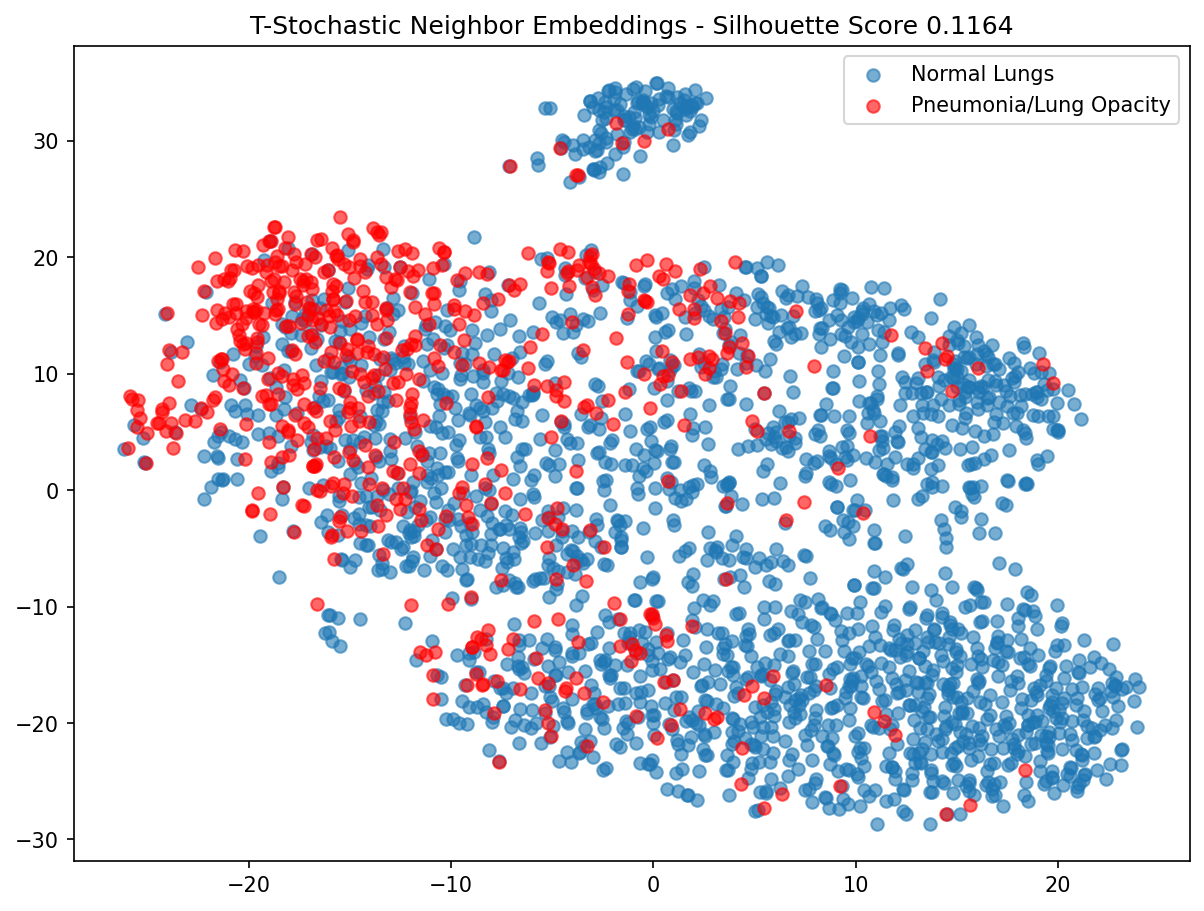

<Figure size 432x288 with 0 Axes>

In [73]:
from sklearn.metrics import silhouette_score

tsne = TSNE(n_components=2, 
            perplexity=50, 
            learning_rate=10, 
            early_exaggeration=30, 
            n_jobs=-1
           ).fit_transform(df_test.iloc[:, 1:-2])

ix_0 = np.where(targets == 0)[0]
ix_1 = np.where(targets == 1)[0]

sil_score = silhouette_score(tsne, targets)

figsize = np.array([6.4, 4.8]) * 1.5

plt.figure(dpi=150, figsize=figsize)
plt.scatter(tsne[ix_0, 0], tsne[ix_0, 1], alpha=.6, label='Normal Lungs')
plt.scatter(tsne[ix_1, 0], tsne[ix_1, 1], alpha=.6, color='red', label='Pneumonia/Lung Opacity')
plt.title('T-Stochastic Neighbor Embeddings - Silhouette Score {:.4f}'.format(sil_score))
plt.legend()
plt.show()
plt.tight_layout()
plt.show()